In [15]:
import matplotlib.pyplot as plt

In [16]:
import yaml
with open('stats', 'r') as f:
    data_full = yaml.load(f.read())

In [17]:
plt.style.use('bmh')

Text(0.5, 0, 'Bandwidth (B)')

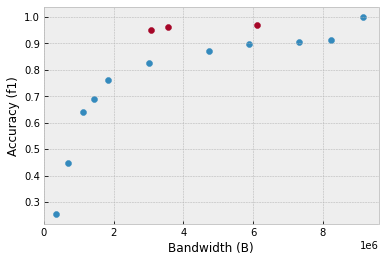

In [18]:
data = [i for i in data_full if 'dashcam_1' in i['video_name']]
metric = 'f1'
plt.ylabel('Accuracy (%s)' % metric)
plt.scatter([i['bw'] for i in data if 'compressed' not in i['video_name']], [i[metric] for i in data if 'compressed' not in i['video_name']])
plt.scatter([i['bw'] for i in data if 'compressed' in i['video_name']], [i[metric] for i in data if 'compressed'  in i['video_name'] ])

plt.xlim(left=0)
plt.xlabel('Bandwidth (B)')


In [19]:
video_names = ['trafficcam_%d' % (i+1) for i in range(4)] + ['dashcam_%d' % (i+1) for i in range(4)]

In [22]:
compressed = sorted([i for i in data_full if '400' in i['video_name']], key = lambda x: x['video_name'])
mpeg_25 = sorted([i for i in data_full if 'qp_25' in i['video_name']], key = lambda x: x['video_name'])
mpeg_24 = sorted([i for i in data_full if 'qp_24' in i['video_name']], key = lambda x: x['video_name'])

In [23]:
normalized_compressed = []
for i in range(len(compresed)):
    normalized_compressed.append({
        'f1': compressed[i]['f1']
        'bw': compressed[i]['bw'] / mpeg_24[i]['bw']
    })

[{'application': 'FasterRCNN_ResNet50_FPN',
  'bw': 8229284,
  'f1': 0.9135025143623352,
  'ground_truth_name': 'videos/dashcam_1_qp_24.mp4',
  'pr': 0.9148396849632263,
  're': 0.9172711372375488,
  'video_name': 'videos/dashcam_1_qp_25.mp4'},
 {'application': 'FasterRCNN_ResNet50_FPN',
  'bw': 5165352,
  'f1': 0.9325054883956909,
  'ground_truth_name': 'videos/dashcam_2_qp_24.mp4',
  'pr': 0.9353170990943909,
  're': 0.9321635961532593,
  'video_name': 'videos/dashcam_2_qp_25.mp4'},
 {'application': 'FasterRCNN_ResNet50_FPN',
  'bw': 5202561,
  'f1': 0.9334103465080261,
  'ground_truth_name': 'videos/dashcam_3_qp_24.mp4',
  'pr': 0.938399076461792,
  're': 0.9326624274253845,
  'video_name': 'videos/dashcam_3_qp_25.mp4'},
 {'application': 'FasterRCNN_ResNet50_FPN',
  'bw': 4425188,
  'f1': 0.9257054924964905,
  'ground_truth_name': 'videos/dashcam_4_qp_24.mp4',
  'pr': 0.9379298090934753,
  're': 0.9197255373001099,
  'video_name': 'videos/dashcam_4_qp_25.mp4'},
 {'application': 'Fas

In [39]:
mpeg[1]['bw'] / compressed2[1]['bw']

1.78188182039999

In [38]:
mpeg[1]['bw']

635346

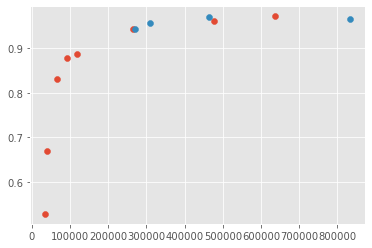

In [17]:
plt.scatter([i['bw'] for i in mpeg], [i['acc'] for i in mpeg])
plt.scatter([i['bw'] for i in compressed], [i['acc'] for i in compressed])